# 小红书销售额预测

## 课题背景

小红书是一个生活方式平台和消费决策入口，是当前著名的电商平台。和其他电商平台不同，小红书是从社区起家。在小红书社区，用户通过文字、图片、视频笔记的分享，记录了这个时代年轻人的正能量和美好生活，小红书通过机器学习对海量信息和人进行精准、高效匹配。

2014年10月小红书福利社上线，旨在解决海外购物的另一个难题：买不到。小红书已累积的海外购物数据，分析出最受欢迎的商品及全球购物趋势，并在此基础上把全世界的好东西，以最短的路径、最简洁的方式提供给用户。

## 问题
基于所给数据，利用Python数据进线性回归，对小红书的销售额进行预测。

# 代码实现

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('./data/小红书数据.csv')

## 数据概览

In [4]:
df.head()

,revenue,gender,age,engaged_last_30,lifecycle,days_since_last_order,previous_order_amount,3rd_party_stores
0,72.98,1.0,59.0,0.0,B,4.26,2343.870,0
1,200.99,1.0,51.0,0.0,A,0.94,8539.872,0
2,69.98,1.0,79.0,0.0,C,4.29,1687.646,1
3,649.99,NaN,NaN,NaN,C,14.90,3498.846,0
4,83.59,NaN,NaN,NaN,C,21.13,3968.490,4


- revenue为购买金额，目标列
- engaged_last_30 最近30天 是否有参加重点活动
- liefecycle 生命周期， ABC分别对应注册0.5，1,2年
- days_since_last_order 距离上次下单时间，单位 天
- previous_order_amount 累计消费金额
- 3rd_party_stores 从第三方商家购买的商品数量

In [5]:
df.shape

(29452, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29452 entries, 0 to 29451
Data columns (total 8 columns):
revenue                    29452 non-null float64
gender                     17723 non-null float64
age                        16716 non-null float64
engaged_last_30            17723 non-null float64
lifecycle                  29452 non-null object
 days_since_last_order     29452 non-null float64
previous_order_amount      29452 non-null float64
3rd_party_stores           29452 non-null int64
dtypes: float64(6), int64(1), object(1)
memory usage: 1.8+ MB


In [7]:
#行缺失
(df.isna().sum()/df.shape[0]).sort_values(ascending=False)

age                        0.432432
engaged_last_30            0.398241
gender                     0.398241
3rd_party_stores           0.000000
previous_order_amount      0.000000
 days_since_last_order     0.000000
lifecycle                  0.000000
revenue                    0.000000
dtype: float64

In [8]:
#列缺失
df.isna().sum(axis=1).value_counts()

0    16716
3    11729
1     1007
dtype: int64

In [9]:
df.describe(include='all')

,revenue,gender,age,engaged_last_30,lifecycle,days_since_last_order,previous_order_amount,3rd_party_stores
count,29452.000000,17723.000000,16716.000000,17723.000000,29452,29452.000000,29452.000000,29452.000000
unique,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,C,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,20201,NaN,NaN,NaN
mean,398.288037,0.950742,60.397404,0.073069,NaN,7.711348,2348.904830,2.286059
std,960.251728,0.216412,14.823026,0.260257,NaN,6.489289,2379.774213,3.538219
min,0.020000,0.000000,18.000000,0.000000,NaN,0.130000,0.000000,0.000000
25%,74.970000,1.000000,50.000000,0.000000,NaN,2.190000,773.506250,0.000000
50%,175.980000,1.000000,60.000000,0.000000,NaN,5.970000,1655.980000,0.000000
75%,499.990000,1.000000,70.000000,0.000000,NaN,11.740000,3096.766500,3.000000


## EDA

### 目标列

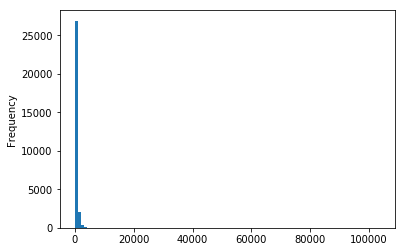

In [10]:
df.revenue.plot(kind='hist',bins=100);

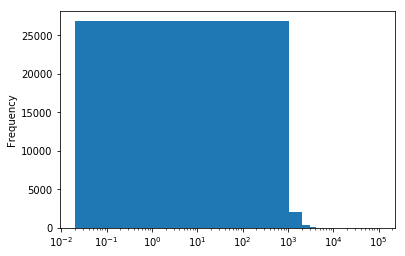

In [11]:
df.revenue.plot(kind='hist',logx=True,bins=100);

消费额差异较大

### 性别

In [12]:
df['gender'].unique()

array([ 1., nan,  0.])

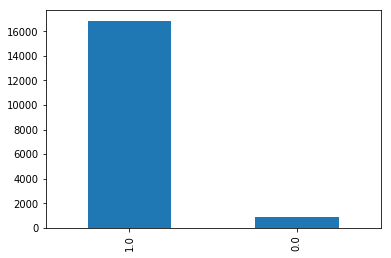

In [13]:
df['gender'].value_counts().plot(kind='bar');

性别列为无次序分类变量，可以做One-Hot Encode处理

### 年龄

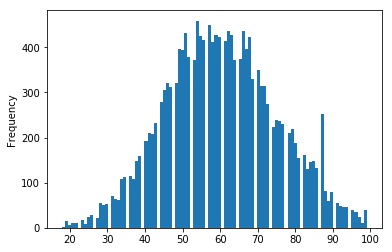

In [14]:
df['age'].plot(kind='hist',bins=100);

In [56]:
df['age'].unique()

array([59., 51., 79., nan, 80., 60., 61., 50., 57., 64., 87., 73., 40.,
       43., 91., 66., 49., 75., 30., 74., 52., 67., 69., 39., 41., 62.,
       71., 72., 54., 65., 76., 89., 53., 56., 88., 86., 78., 63., 44.,
       48., 55., 94., 46., 70., 68., 42., 47., 84., 34., 58., 77., 36.,
       82., 28., 81., 95., 97., 96., 83., 37., 45., 33., 38., 35., 31.,
       32., 23., 90., 26., 99., 29., 85., 93., 25., 22., 98., 92., 21.,
       27., 20., 24., 19., 18.])

### 用户行为特征

In [15]:
df['engaged_last_30'].unique()

array([ 0., nan,  1.])

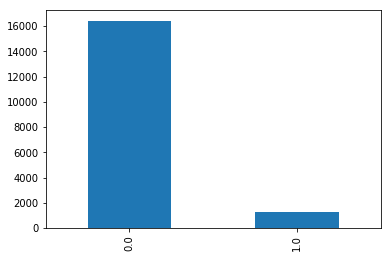

In [16]:
df['engaged_last_30'].value_counts().plot(kind='bar');

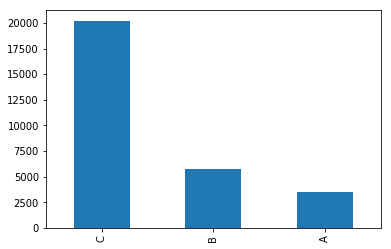

In [17]:
df['lifecycle'].value_counts().plot(kind='bar');

注意：这里的ABC是定序分类

In [18]:
df['days_since_last_order'].plot(kind='hist');

KeyError: 'days_since_last_order'

In [19]:
df.columns

Index(['revenue', 'gender', 'age', 'engaged_last_30', 'lifecycle',
       ' days_since_last_order ', 'previous_order_amount', '3rd_party_stores'],
      dtype='object')

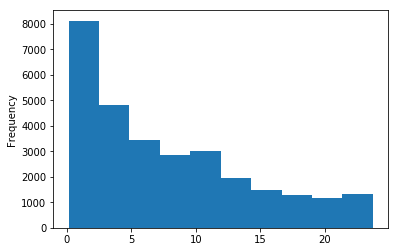

In [20]:
df[' days_since_last_order '].plot(kind='hist');

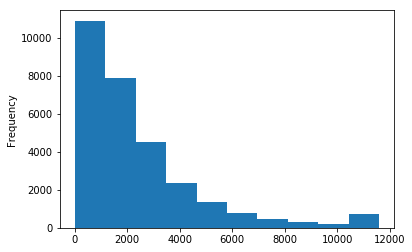

In [21]:
df['previous_order_amount'].plot(kind='hist');

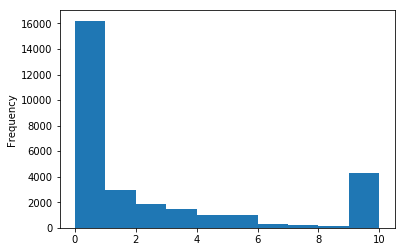

In [22]:
df['3rd_party_stores'].plot(kind='hist');

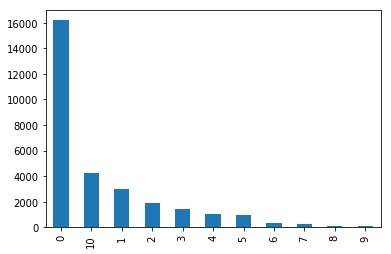

In [23]:
df['3rd_party_stores'].value_counts().plot(kind='bar');

这个变量可以作为分类变量去处理。

### 各特征与目标列关系

#### 数值变量

In [24]:
df.columns

Index(['revenue', 'gender', 'age', 'engaged_last_30', 'lifecycle',
       ' days_since_last_order ', 'previous_order_amount', '3rd_party_stores'],
      dtype='object')

In [25]:
numerical_features = ['age',' days_since_last_order ','previous_order_amount']

In [26]:
df[numerical_features+['revenue']].corr()

,age,days_since_last_order,previous_order_amount,revenue
age,1.000000,0.013619,-0.048714,-0.073015
days_since_last_order,0.013619,1.000000,-0.085269,0.036654
previous_order_amount,-0.048714,-0.085269,1.000000,0.168540
revenue,-0.073015,0.036654,0.168540,1.000000


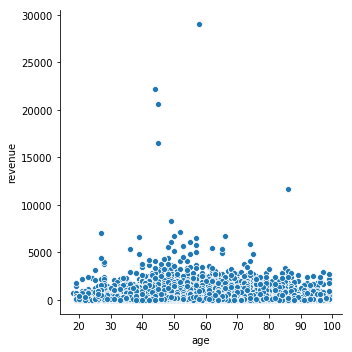

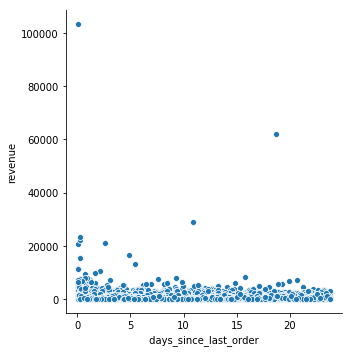

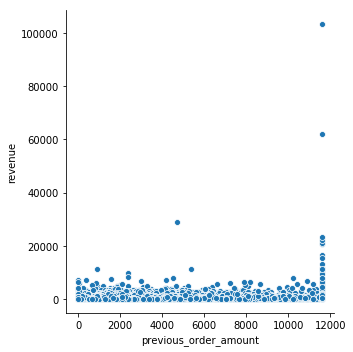

In [27]:
for col in numerical_features:
    sns.relplot(x=col,y='revenue',data=df)

数值跨度太大

#### 分类变量

In [28]:
#把3rd_party_stores当做分类处理
categorical_features = ['gender', 'engaged_last_30', 'lifecycle','3rd_party_stores']

In [29]:
for col in categorical_features:
    print(col)
    print(df.groupby(col)['revenue'].agg({'mean':'mean','sum':'sum','std':'std','median':'median'}).sort_values(by='mean'))
    print('\n')

gender
              mean           sum         std  median
gender                                              
0.0     316.346802  2.761708e+05  566.606482  139.98
1.0     387.972592  6.537338e+06  655.523780  175.98


engaged_last_30
                       mean           sum          std  median
engaged_last_30                                               
0.0              369.839618  6.075725e+06   579.590923  160.37
1.0              569.717137  7.377837e+05  1230.162096  299.99


lifecycle
                 mean           sum          std   median
lifecycle                                                
B          381.348012  2.177116e+06   605.828160  179.980
C          396.844800  8.016662e+06   778.374439  174.980
A          433.823171  1.536602e+06  1902.496280  170.945


3rd_party_stores
                        mean           sum          std   median
3rd_party_stores                                                
9                 300.545517  1.743164e+04   344.337272  189

d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until
d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until
d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until
d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  This is separate from the ipykernel pack

## 清洗

In [30]:
df_clean = df.copy()

### 处理缺失值

对于`engaged_last_30`列，我们可以用`0`来填充缺失值，另外两列则保留缺失值。
> 这里有待商榷，可以根据后面模型的结果，来进行调试

In [31]:
df_clean['engaged_last_30'] = df_clean['engaged_last_30'].fillna(0.0)

In [32]:
df_clean['gender'] = df_clean['gender'].fillna('unknown')

In [33]:
#用均值填充
df_clean['age'] = df_clean['age'].fillna(df_clean['age'].mean())

### 更正特征数据类型

In [34]:
df_clean['gender'] = df_clean['gender'].astype(str)
df_clean['engaged_last_30'] = df_clean['engaged_last_30'].astype(str)

In [35]:
df_clean['3rd_party_stores'] = df_clean['3rd_party_stores'].astype(str)

### 格式化列名

In [36]:
df_clean.columns

Index(['revenue', 'gender', 'age', 'engaged_last_30', 'lifecycle',
       ' days_since_last_order ', 'previous_order_amount', '3rd_party_stores'],
      dtype='object')

In [37]:
df_clean = df_clean.rename(columns=lambda x: x.strip())

In [38]:
df_clean.columns

Index(['revenue', 'gender', 'age', 'engaged_last_30', 'lifecycle',
       'days_since_last_order', 'previous_order_amount', '3rd_party_stores'],
      dtype='object')

### 特征变换及编码

#### 数值型变量

In [39]:
numerical_features = ['age','days_since_last_order','previous_order_amount']
df_clean.describe()

,revenue,age,days_since_last_order,previous_order_amount
count,29452.000000,29452.000000,29452.000000,29452.000000
mean,398.288037,60.397404,7.711348,2348.904830
std,960.251728,11.167091,6.489289,2379.774213
min,0.020000,18.000000,0.130000,0.000000
25%,74.970000,58.000000,2.190000,773.506250
50%,175.980000,60.397404,5.970000,1655.980000
75%,499.990000,62.000000,11.740000,3096.766500
max,103466.100000,99.000000,23.710000,11597.900000


In [40]:
scaler = StandardScaler()
df_clean[numerical_features] = scaler.fit_transform(df_clean[numerical_features])

In [41]:
df_clean.describe()

,revenue,age,days_since_last_order,previous_order_amount
count,29452.000000,2.945200e+04,2.945200e+04,2.945200e+04
mean,398.288037,-1.723009e-16,-3.125004e-16,3.599343e-16
std,960.251728,1.000017e+00,1.000017e+00,1.000017e+00
min,0.020000,-3.796703e+00,-1.168306e+00,-9.870452e-01
25%,74.970000,-2.146884e-01,-8.508547e-01,-6.620062e-01
50%,175.980000,0.000000e+00,-2.683465e-01,-2.911775e-01
75%,499.990000,1.435131e-01,6.208261e-01,3.142627e-01
max,103466.100000,3.456876e+00,2.465436e+00,3.886567e+00


#### 分类变量

In [42]:
dummy_features = pd.get_dummies(df_clean[categorical_features],drop_first=True)

In [43]:
df_clean = df_clean.join(dummy_features).drop(categorical_features,axis=1)

In [86]:
df_clean.head()

,revenue,age,days_since_last_order,previous_order_amount,gender_1.0,gender_unknown,engaged_last_30_1.0,lifecycle_B,lifecycle_C,3rd_party_stores_1,3rd_party_stores_10,3rd_party_stores_2,3rd_party_stores_3,3rd_party_stores_4,3rd_party_stores_5,3rd_party_stores_6,3rd_party_stores_7,3rd_party_stores_8,3rd_party_stores_9
0,72.98,-0.125138,-0.531862,-0.002116,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,200.99,-0.841541,-1.043483,2.601538,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,69.98,1.665869,-0.527239,-0.277871,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0
3,649.99,0.000000,1.107791,0.483223,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,83.59,0.000000,2.067851,0.680574,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0


## 训练

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [46]:
y = df_clean['revenue']
X = df_clean.drop('revenue',axis=1)

In [47]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=7)

In [48]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [49]:
y_pred = lr.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

1250.6947836948852

In [50]:
lr.coef_

array([ -26.37567161,   56.92927842,  147.99812239,   24.17623481,
         80.84501908,  118.06983619,  -10.97886718,   22.12176042,
        -94.59439584,  -21.5668265 , -102.22637235,  -78.82516219,
       -115.13097099, -135.09467765,  -87.56741474,  -89.38855363,
       -100.37232432, -204.42361452])

In [51]:
pd.DataFrame(index=X.columns,data=lr.coef_).sort_values(by=0)

,0
3rd_party_stores_9,-204.423615
3rd_party_stores_5,-135.094678
3rd_party_stores_4,-115.130971
3rd_party_stores_2,-102.226372
3rd_party_stores_8,-100.372324
3rd_party_stores_1,-94.594396
3rd_party_stores_7,-89.388554
3rd_party_stores_6,-87.567415
3rd_party_stores_3,-78.825162
age,-26.375672


In [52]:
lr.intercept_

362.71422836598975

## 优化

In [230]:
df_opti = df.copy()

In [231]:
df_opti = df_opti.rename(columns=lambda x: x.strip())

- 异常值处理
- 对每一行中的`NaN`计数
- `engaged_last_30` 中的NaN作为新列
- `3rd_party_stores`作为数值变量；或进行合并分组
- `lifecycle`顺序编码

- `age`分箱，然后顺序编码


- 异常值处理

In [232]:
new_max = df_opti.revenue.quantile(0.75) + 2 * (df_opti.revenue.quantile(0.75) - df_opti.revenue.quantile(0.25))
df_opti = df_opti[df_opti['revenue'] <= new_max]

In [233]:
new_max_amount = df_opti.previous_order_amount.quantile(0.75) + 2 * (df_opti.previous_order_amount.quantile(0.75) - df_opti.previous_order_amount.quantile(0.25))
df_opti = df_opti[df_opti['previous_order_amount'] <= new_max_amount]

In [234]:
(df.shape[0] - df_opti.shape[0])/df.shape[0]

0.09018063289420074

- `NAN`计数

In [235]:
df_opti['nan_num'] = df_opti.isna().sum(axis=1)

- 缺失值处理

In [236]:
df_opti['age'] = df_opti['age'].fillna(df_opti['age'].mean())
df_opti['gender'] = df_opti['gender'].fillna('unknown')
df_opti['engaged_last_30'] = df_opti['engaged_last_30'].fillna('unknown')

- 特征编码

In [237]:
def trans_3rd(x):
    if x == 0:
        return 0
    elif x in [3,6,10]:
        return 1
    else:
        return 2

In [238]:
df_opti['3rd_party_stores'] = df_opti['3rd_party_stores'].apply(trans_3rd)

In [239]:
df_opti[['3rd_party_stores','nan_num','lifecycle']] = df_opti[['3rd_party_stores','nan_num','lifecycle']].astype(str)

In [240]:
df_opti = pd.get_dummies(df_opti,drop_first=True)

In [241]:
scaler = StandardScaler()
df_opti[numerical_features] = scaler.fit_transform(df_opti[numerical_features])

In [242]:
df_opti.head()

,revenue,age,days_since_last_order,previous_order_amount,gender_1.0,gender_unknown,engaged_last_30_1.0,engaged_last_30_unknown,lifecycle_B,lifecycle_C,3rd_party_stores_1,3rd_party_stores_2,nan_num_1,nan_num_3
0,72.98,-0.145774,-0.537714,0.253584,1,0,0,0,1,0,0,0,0,0
2,69.98,1.651338,-0.533076,-0.151443,1,0,0,0,0,1,0,1,0,0
3,649.99,0.000000,1.107068,0.966445,0,1,0,1,0,1,0,0,0,1
4,83.59,0.000000,2.070130,1.256313,0,1,0,1,0,1,0,1,0,1
5,319.99,1.741194,1.142622,0.542203,1,0,0,0,0,1,1,0,0,0


- 训练

In [243]:
y = df_opti['revenue']
X = df_opti.drop('revenue',axis=1)

In [244]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=7)

In [245]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [246]:
y_pred = lr.predict(x_test)
mean_squared_error(y_test,y_pred)

81627.12706256013

In [247]:
np.sqrt(mean_squared_error(y_test,y_pred))

285.70461505296015

In [248]:
lr.coef_

array([-15.3164049 ,  44.61368074,  33.97414258,  32.09196614,
        17.44436322,  53.79421034,  17.44436322,   4.20743098,
        27.39844172, -79.91463999, -91.16885318,  67.11335497,
        17.44436322])

In [249]:
lr.intercept_

264.2451770576717